In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Weather

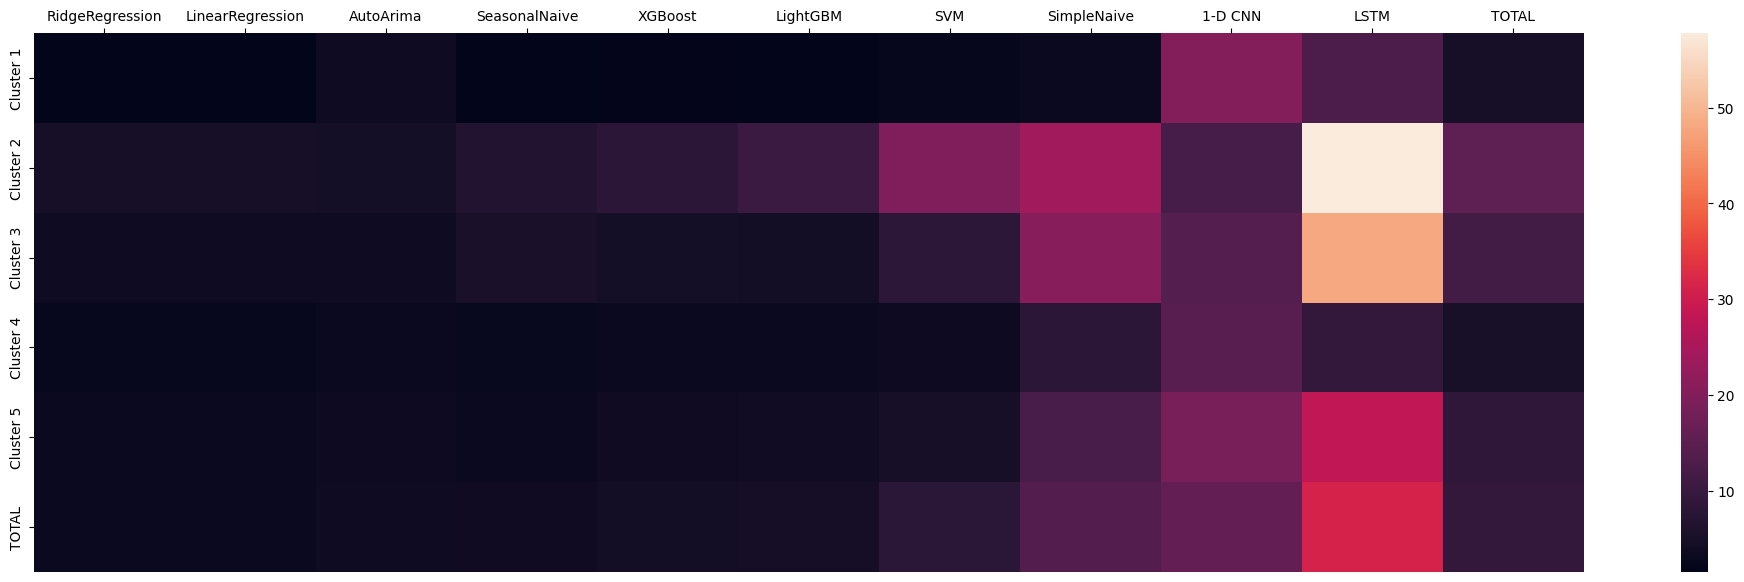

In [2]:
weather_clusters = pd.read_pickle('../Dataset/cluster_data/ts_weather_clusters.pkl').values
weather_error = pd.read_pickle('../Dataset/performance_scores/error_weather.pkl')

clusters = np.unique(weather_clusters)

cluster_performance_data_weather = {model: [] for model in weather_error.columns}

for cluster in clusters:
    cluster_data = weather_error.iloc[np.where(weather_clusters==cluster)]
    for model, metric in cluster_data.mean().items():
        cluster_performance_data_weather[model].append(metric)

cluster_performance_matrix_weather = pd.DataFrame(cluster_performance_data_weather, index = [f"Cluster {cluster_id+1}" for cluster_id in clusters])
cluster_performance_matrix_weather = pd.concat([cluster_performance_matrix_weather.T,cluster_performance_matrix_weather.mean().rename('TOTAL')], axis=1).T
cluster_performance_matrix_weather = cluster_performance_matrix_weather.sort_values(by='TOTAL', axis=1, ascending=True)
cluster_performance_matrix_weather['TOTAL'] = cluster_performance_matrix_weather.mean(axis = 1)
plt.figure(figsize=(len(clusters)*5,len(clusters)*1.4))
sns.heatmap(cluster_performance_matrix_weather)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)

## Finance

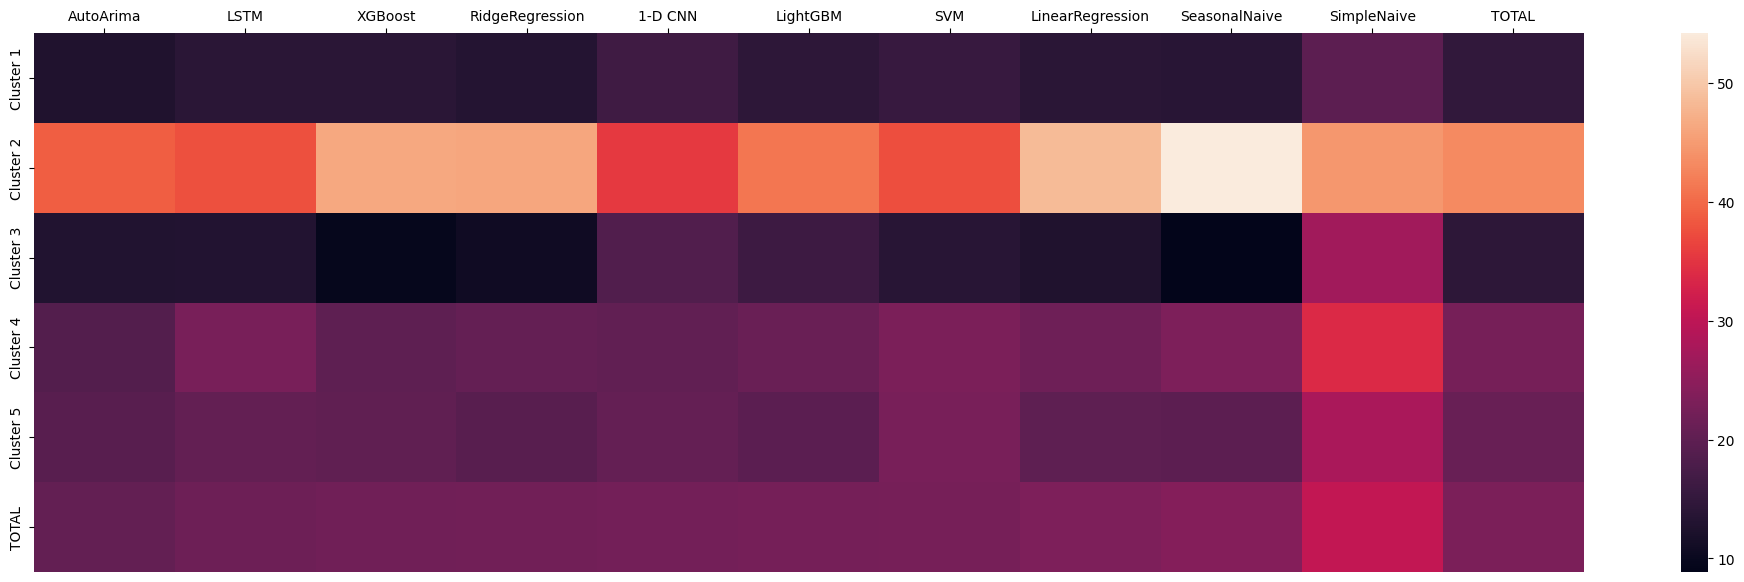

In [3]:
finance_clusters = pd.read_pickle('../Dataset/cluster_data/ts_finance_clusters.pkl').values
finance_error = pd.read_pickle('../Dataset/performance_scores/error_finance.pkl')

clusters = np.unique(finance_clusters)

cluster_performance_data_finance = {model: [] for model in finance_error.columns}

for cluster in clusters:
    cluster_data = finance_error.iloc[np.where(finance_clusters==cluster)]
    for model, metric in cluster_data.mean().items():
        cluster_performance_data_finance[model].append(metric)

cluster_performance_matrix_finance = pd.DataFrame(cluster_performance_data_finance, index = [f"Cluster {cluster_id+1}" for cluster_id in clusters])
cluster_performance_matrix_finance = pd.concat([cluster_performance_matrix_finance.T,cluster_performance_matrix_finance.mean().rename('TOTAL')], axis=1).T
cluster_performance_matrix_finance = cluster_performance_matrix_finance.sort_values(by='TOTAL', axis=1, ascending=True)
cluster_performance_matrix_finance['TOTAL'] = cluster_performance_matrix_finance.mean(axis = 1)
plt.figure(figsize=(len(clusters)*5,len(clusters)*1.4))
sns.heatmap(cluster_performance_matrix_finance)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)